In [1]:
import pandas as pd  # import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import requests
from bs4 import BeautifulSoup
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
import re
plt.style.use("fivethirtyeight")

In [3]:
df = pd.read_csv("oyo_final_webscrappeddata.csv") # read webscrapped data

# Cleaning Data:
Data cleaning or cleansing is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data

In [4]:
df

,title,rating,address,price,base_price,discount,wizard
0,SPOT ON 76312 Sri Balaji Comforts,3.1 (1083 Ratings)·Fair,"Bangalore Urban, Bangalore",₹243,₹1248,80% off,WIZARD MEMBER
1,CAPITAL O75993 Hotel Shanti Nivas,4.5 (1316 Ratings)·Excellent,"Near Yeshwanthpur , Sri Raghavendra Layout, Ba...",₹531,₹2426,78% off,WIZARD MEMBER
2,SPOT ON 41554 Hotel Sri Thirumala Paradise,4.5 (3172 Ratings)·Excellent,"Sevashrama, Bangalore",₹374,₹1127,66% off,WIZARD MEMBER
3,SPOT ON 65593 Yatra Inn,4.5 (2530 Ratings)·Excellent,"Lalbagh, Bangalore",₹673,₹1478,54% off,NaN
4,OYO 10522 Varcity Emerald,3.9 (1632 Ratings)·Good,"Near KEB Colony, BTM Layout 1, Bangalore",₹425,₹2080,79% off,NaN
...,...,...,...,...,...,...,...
2857,OYO Townhouse 196 De Alphabet,4.0 (4051 Ratings)·Very Good,"Near Sai Baba Temple, Gudimalkapur, Hyderabad",NaN,NaN,NaN,WIZARD MEMBER
2858,Capital O 24450 Hotel Surabhi,3.3 (652 Ratings)·Fair,"Near Vishnu Theatre, Vijayawada Highway,Hyderabad",NaN,NaN,NaN,NaN
2859,OYO 1108 Hotel Saraswathi Residency,4.1 (452 Ratings)·Very Good,"Near Nalanda School, S.R. Nagar, Hyderabad",NaN,NaN,NaN,NaN
2860,OYO Flagship 983 Hotel Surya Residency,4.0 (380 Ratings)·Very Good,"Near SR Nagar Police Station, Ameerpet, Hyderabad",NaN,NaN,NaN,NaN


In [5]:
df.wizard.fillna('missing').value_counts()

missing          1598
WIZARD MEMBER    1264
Name: wizard, dtype: int64

In [6]:
df.wizard = df.wizard.map({"WIZARD MEMBER":True,np.NaN:False})
# redefining wizard status to True and False 

In [7]:
df.wizard.value_counts()

False    1598
True     1264
Name: wizard, dtype: int64

In [8]:
df.head()

,title,rating,address,price,base_price,discount,wizard
0,SPOT ON 76312 Sri Balaji Comforts,3.1 (1083 Ratings)·Fair,"Bangalore Urban, Bangalore",₹243,₹1248,80% off,True
1,CAPITAL O75993 Hotel Shanti Nivas,4.5 (1316 Ratings)·Excellent,"Near Yeshwanthpur , Sri Raghavendra Layout, Ba...",₹531,₹2426,78% off,True
2,SPOT ON 41554 Hotel Sri Thirumala Paradise,4.5 (3172 Ratings)·Excellent,"Sevashrama, Bangalore",₹374,₹1127,66% off,True
3,SPOT ON 65593 Yatra Inn,4.5 (2530 Ratings)·Excellent,"Lalbagh, Bangalore",₹673,₹1478,54% off,False
4,OYO 10522 Varcity Emerald,3.9 (1632 Ratings)·Good,"Near KEB Colony, BTM Layout 1, Bangalore",₹425,₹2080,79% off,False


In [9]:
#splitting rating column to ratings, number of reviews and remarks using regex
re_Rating = r"\b\d\.\d\b"
re_Num_of_Reviews = r"[\d]+\s+Ratings"
re_remarks =r"·.*"


In [10]:
ratings_dict = {"Ratings":re_Rating,"No_of_Reviews":re_Num_of_Reviews,"Remarks":re_remarks}

for col_name, pattern in ratings_dict.items():
    df[col_name] = df["rating"].apply(lambda x:re.search(pattern,str(x)).group() if re.search(pattern,str(x)) != None  else np.NaN)

In [11]:
df

,title,rating,address,price,base_price,discount,wizard,Ratings,No_of_Reviews,Remarks
0,SPOT ON 76312 Sri Balaji Comforts,3.1 (1083 Ratings)·Fair,"Bangalore Urban, Bangalore",₹243,₹1248,80% off,True,3.1,1083 Ratings,·Fair
1,CAPITAL O75993 Hotel Shanti Nivas,4.5 (1316 Ratings)·Excellent,"Near Yeshwanthpur , Sri Raghavendra Layout, Ba...",₹531,₹2426,78% off,True,4.5,1316 Ratings,·Excellent
2,SPOT ON 41554 Hotel Sri Thirumala Paradise,4.5 (3172 Ratings)·Excellent,"Sevashrama, Bangalore",₹374,₹1127,66% off,True,4.5,3172 Ratings,·Excellent
3,SPOT ON 65593 Yatra Inn,4.5 (2530 Ratings)·Excellent,"Lalbagh, Bangalore",₹673,₹1478,54% off,False,4.5,2530 Ratings,·Excellent
4,OYO 10522 Varcity Emerald,3.9 (1632 Ratings)·Good,"Near KEB Colony, BTM Layout 1, Bangalore",₹425,₹2080,79% off,False,3.9,1632 Ratings,·Good
...,...,...,...,...,...,...,...,...,...,...
2857,OYO Townhouse 196 De Alphabet,4.0 (4051 Ratings)·Very Good,"Near Sai Baba Temple, Gudimalkapur, Hyderabad",NaN,NaN,NaN,True,4.0,4051 Ratings,·Very Good
2858,Capital O 24450 Hotel Surabhi,3.3 (652 Ratings)·Fair,"Near Vishnu Theatre, Vijayawada Highway,Hyderabad",NaN,NaN,NaN,False,3.3,652 Ratings,·Fair
2859,OYO 1108 Hotel Saraswathi Residency,4.1 (452 Ratings)·Very Good,"Near Nalanda School, S.R. Nagar, Hyderabad",NaN,NaN,NaN,False,4.1,452 Ratings,·Very Good
2860,OYO Flagship 983 Hotel Surya Residency,4.0 (380 Ratings)·Very Good,"Near SR Nagar Police Station, Ameerpet, Hyderabad",NaN,NaN,NaN,False,4.0,380 Ratings,·Very Good


In [12]:
df.drop("rating",axis = 1, inplace = True) # droping unwanted column rating 

In [13]:
df.head()

,title,address,price,base_price,discount,wizard,Ratings,No_of_Reviews,Remarks
0,SPOT ON 76312 Sri Balaji Comforts,"Bangalore Urban, Bangalore",₹243,₹1248,80% off,True,3.1,1083 Ratings,·Fair
1,CAPITAL O75993 Hotel Shanti Nivas,"Near Yeshwanthpur , Sri Raghavendra Layout, Ba...",₹531,₹2426,78% off,True,4.5,1316 Ratings,·Excellent
2,SPOT ON 41554 Hotel Sri Thirumala Paradise,"Sevashrama, Bangalore",₹374,₹1127,66% off,True,4.5,3172 Ratings,·Excellent
3,SPOT ON 65593 Yatra Inn,"Lalbagh, Bangalore",₹673,₹1478,54% off,False,4.5,2530 Ratings,·Excellent
4,OYO 10522 Varcity Emerald,"Near KEB Colony, BTM Layout 1, Bangalore",₹425,₹2080,79% off,False,3.9,1632 Ratings,·Good


In [14]:
def parse_sym(sym): # function to pick only float values from a string
    if pd.notna(sym):
        sym = re.sub(r"[^0-9.]","",str(sym))
        return float(sym)
    else:
        return sym

In [15]:
df[["price","base_price","discount","Ratings","No_of_Reviews"]] =df[["price","base_price","discount","Ratings","No_of_Reviews"]].applymap(parse_sym)

In [16]:
df

,title,address,price,base_price,discount,wizard,Ratings,No_of_Reviews,Remarks
0,SPOT ON 76312 Sri Balaji Comforts,"Bangalore Urban, Bangalore",243.0,1248.0,80.0,True,3.1,1083.0,·Fair
1,CAPITAL O75993 Hotel Shanti Nivas,"Near Yeshwanthpur , Sri Raghavendra Layout, Ba...",531.0,2426.0,78.0,True,4.5,1316.0,·Excellent
2,SPOT ON 41554 Hotel Sri Thirumala Paradise,"Sevashrama, Bangalore",374.0,1127.0,66.0,True,4.5,3172.0,·Excellent
3,SPOT ON 65593 Yatra Inn,"Lalbagh, Bangalore",673.0,1478.0,54.0,False,4.5,2530.0,·Excellent
4,OYO 10522 Varcity Emerald,"Near KEB Colony, BTM Layout 1, Bangalore",425.0,2080.0,79.0,False,3.9,1632.0,·Good
...,...,...,...,...,...,...,...,...,...
2857,OYO Townhouse 196 De Alphabet,"Near Sai Baba Temple, Gudimalkapur, Hyderabad",NaN,NaN,NaN,True,4.0,4051.0,·Very Good
2858,Capital O 24450 Hotel Surabhi,"Near Vishnu Theatre, Vijayawada Highway,Hyderabad",NaN,NaN,NaN,False,3.3,652.0,·Fair
2859,OYO 1108 Hotel Saraswathi Residency,"Near Nalanda School, S.R. Nagar, Hyderabad",NaN,NaN,NaN,False,4.1,452.0,·Very Good
2860,OYO Flagship 983 Hotel Surya Residency,"Near SR Nagar Police Station, Ameerpet, Hyderabad",NaN,NaN,NaN,False,4.0,380.0,·Very Good


In [17]:
df.address.value_counts()

India, Goa                                     72
Near New Delhi Railway Station, Delhi          45
India, Hyderabad                               39
India, Delhi                                   36
India, Bangalore                               33
                                               ..
Near BTM Water Tank, Mico Layout, Bangalore     1
Halasuru, Bangalore                             1
Near Alipore guest House, Mangalam, Kolkata     1
Near HSR Club, Kadalda Meen, Bangalore          1
Near Ladies Park, Beniapukur, Kolkata           1
Name: address, Length: 878, dtype: int64

In [18]:
re_address = r"(Bangalore|Banglore|Bengaluru|Indiranagar|Hebbal|Karnataka|karnataka|Ghaziabad|Chennai|Mumbai|Goa|Calangute|Baga|Delhi|Karol Bagh|Hyderabad|Pune|Noida|Kolkata|Ooty|Pondicherry|Puducherry|bangalore|chennai|mumbai|goa|delhi|hyderabad|pune|noida|NOIDA|SECTOR|Sector|sector|kolkata|KOLKATA|ooty|pondicherry)"

In [19]:
df["place"]= df["address"].apply(lambda x:re.search(re_address,x).group().lower() if re.search(re_address,x) else np.NaN)

In [20]:
df.place.fillna("missing").value_counts()

hyderabad      456
bangalore      421
delhi          413
kolkata        269
mumbai         266
goa            180
pune           168
chennai        159
sector         135
missing        115
noida           90
calangute       39
karol bagh      36
pondicherry     26
baga            20
karnataka       16
bengaluru       15
puducherry      12
banglore         9
indiranagar      8
ooty             6
hebbal           3
Name: place, dtype: int64

In [21]:
df.head(1)

,title,address,price,base_price,discount,wizard,Ratings,No_of_Reviews,Remarks,place
0,SPOT ON 76312 Sri Balaji Comforts,"Bangalore Urban, Bangalore",243.0,1248.0,80.0,True,3.1,1083.0,·Fair,bangalore


replacing diffrently spelled place names with one place name for better analysis

In [22]:
df["place"].replace({'karnataka':"bangalore",'bengaluru':"bangalore",'bengaluru':"bangalore",'indiranagar':"bangalore",'banglore':"bangalore",'hebbal':'bangalore'}, inplace = True)

In [23]:
df["place"].replace({'sector':"noida",'ghaziabad':"noida"}, inplace = True)

In [24]:
df["place"].replace({'calangute':"goa",'baga':"goa"}, inplace = True)

In [25]:
df["place"].replace({'puducherry':"pondicherry"}, inplace = True)

In [26]:
df["place"].replace({'karol bagh':"delhi"}, inplace = True)

In [27]:
df.place.fillna("missing").value_counts()

bangalore      472
hyderabad      456
delhi          449
kolkata        269
mumbai         266
goa            239
noida          225
pune           168
chennai        159
missing        115
pondicherry     38
ooty             6
Name: place, dtype: int64

In [28]:
filt = df.place.isna()

In [29]:
df.loc[filt]["address"].values

array(['Plot No.15, 1st Cross Buvanappa Layout, Opposite Forum Mall,Thavarekere Main Road',
       'Above Vishal Mega mart',
       'NEAR BY CMBT BUS STAND & Passport and medical verification centre',
       'Near Pantaloons, N Usman Rd, Parthasarathi Puram, T. Nagar',
       'Near Stanley hospital, Central station, Beach station, Flower market',
       'Near Anna Arivalayam & DMS Complex Teynampet',
       '95, Gowdia Mutt RD, Near Express Avenune Mall',
       '4, E Road ,Koyembedu, Near Omni Bus Stand',
       '9th Avenue, Near Ashok Pillar', 'Near Aarey Colony, Goregaon',
       'Taj House no.1, Shanti Nagar, Nxt to pinnacle business park, Near Onida house, Mahakali caves road, Andheri east',
       'Hotel Shubhangan-21st road,Khar West',
       'SAI NATH NAGAR ,NEAR KURLA LIONS GARDEN LBS ROAD TOWARD SION',
       'Near US Consulate, BKC',
       '9A Rajkutir, 3rd Road,next to Doolally Taproom,next to Khar railway station, Khar West',
       '9A Rajkutir, 3rd Road,next to Doolally

In [30]:
df.shape

(2862, 10)

In [31]:
df.dropna(subset = ['place'], inplace = True) # dropping rows where no proper city name is not mentioned

In [32]:
df.shape

(2747, 10)

In [33]:
df.head()

,title,address,price,base_price,discount,wizard,Ratings,No_of_Reviews,Remarks,place
0,SPOT ON 76312 Sri Balaji Comforts,"Bangalore Urban, Bangalore",243.0,1248.0,80.0,True,3.1,1083.0,·Fair,bangalore
1,CAPITAL O75993 Hotel Shanti Nivas,"Near Yeshwanthpur , Sri Raghavendra Layout, Ba...",531.0,2426.0,78.0,True,4.5,1316.0,·Excellent,bangalore
2,SPOT ON 41554 Hotel Sri Thirumala Paradise,"Sevashrama, Bangalore",374.0,1127.0,66.0,True,4.5,3172.0,·Excellent,bangalore
3,SPOT ON 65593 Yatra Inn,"Lalbagh, Bangalore",673.0,1478.0,54.0,False,4.5,2530.0,·Excellent,bangalore
4,OYO 10522 Varcity Emerald,"Near KEB Colony, BTM Layout 1, Bangalore",425.0,2080.0,79.0,False,3.9,1632.0,·Good,bangalore


In [34]:
df.drop("address",axis = 1, inplace = True) # dropping address column after extracting place name from it

In [35]:
df.head()

,title,price,base_price,discount,wizard,Ratings,No_of_Reviews,Remarks,place
0,SPOT ON 76312 Sri Balaji Comforts,243.0,1248.0,80.0,True,3.1,1083.0,·Fair,bangalore
1,CAPITAL O75993 Hotel Shanti Nivas,531.0,2426.0,78.0,True,4.5,1316.0,·Excellent,bangalore
2,SPOT ON 41554 Hotel Sri Thirumala Paradise,374.0,1127.0,66.0,True,4.5,3172.0,·Excellent,bangalore
3,SPOT ON 65593 Yatra Inn,673.0,1478.0,54.0,False,4.5,2530.0,·Excellent,bangalore
4,OYO 10522 Varcity Emerald,425.0,2080.0,79.0,False,3.9,1632.0,·Good,bangalore


In [36]:
df.title.value_counts() 

OYO 13277 Hotel Neelam Palace                          5
OYO 10522 Varcity Emerald                              4
OYO 19995 Hotel Grand Heritage                         4
OYO Flagship 11640 Hotel Aaira Inn                     4
Collection O 8479 Hotel Ambience                       4
                                                      ..
OYO Flagship 77620 Binayak Banquet & Ac Guest House    1
OYO 2506 Hotel Homely Raj                              1
OYO Flagship 49775 Tranquil Stay                       1
OYO TOWNHOUSE 014, MG Road                             1
OYO Home  80399 Supreet Home                           1
Name: title, Length: 1042, dtype: int64

In [37]:
# some hotels are repeated in the listing,such rows can be deleted preserving first row

In [38]:
filt = df.title =="OYO 27942 Hotel Garden View"
df.loc[filt]

,title,price,base_price,discount,wizard,Ratings,No_of_Reviews,Remarks,place
309,OYO 27942 Hotel Garden View,NaN,NaN,NaN,False,3.3,224.0,·Fair,mumbai
1340,OYO 27942 Hotel Garden View,465.0,1051.0,55.0,False,3.3,224.0,·Fair,mumbai
2468,OYO 27942 Hotel Garden View,NaN,NaN,NaN,False,3.3,224.0,·Fair,mumbai


In [39]:
filt = df.title =="OYO 26900 Royal Inn"
df.loc[filt]

,title,price,base_price,discount,wizard,Ratings,No_of_Reviews,Remarks,place
7,OYO 26900 Royal Inn,463.0,2240.0,79.0,True,2.6,275.0,·Fair,bangalore
1096,OYO 26900 Royal Inn,476.0,2240.0,78.0,True,2.6,275.0,·Fair,bangalore
2165,OYO 26900 Royal Inn,476.0,2240.0,78.0,True,2.6,275.0,·Fair,bangalore


In [40]:
df.shape

(2747, 9)

In [41]:
df.drop_duplicates(keep='first', inplace=True, ignore_index =True)

In [42]:
df.shape

(1194, 9)

In [43]:
df.head()

,title,price,base_price,discount,wizard,Ratings,No_of_Reviews,Remarks,place
0,SPOT ON 76312 Sri Balaji Comforts,243.0,1248.0,80.0,True,3.1,1083.0,·Fair,bangalore
1,CAPITAL O75993 Hotel Shanti Nivas,531.0,2426.0,78.0,True,4.5,1316.0,·Excellent,bangalore
2,SPOT ON 41554 Hotel Sri Thirumala Paradise,374.0,1127.0,66.0,True,4.5,3172.0,·Excellent,bangalore
3,SPOT ON 65593 Yatra Inn,673.0,1478.0,54.0,False,4.5,2530.0,·Excellent,bangalore
4,OYO 10522 Varcity Emerald,425.0,2080.0,79.0,False,3.9,1632.0,·Good,bangalore


In [44]:
# cleaning data based on categories introduced by OYO which is generally mentioned in the begining of the hotel name

In [45]:
re_speciality = r"((SPOT ON|spot on|Spot on|CAPITAL O|capital o|Capital O|FLAGSHIP|flagship|Flagship|COLLECTION|collection|Collection|Home|Homes|home|homes|HOME|HOMES|Townhouse|townhouse))"

In [46]:
df["Speciality"]= df["title"].apply(lambda x:re.search(re_speciality,x).group().lower() if re.search(re_speciality,x) else "normal")

In [47]:
df.head()

,title,price,base_price,discount,wizard,Ratings,No_of_Reviews,Remarks,place,Speciality
0,SPOT ON 76312 Sri Balaji Comforts,243.0,1248.0,80.0,True,3.1,1083.0,·Fair,bangalore,spot on
1,CAPITAL O75993 Hotel Shanti Nivas,531.0,2426.0,78.0,True,4.5,1316.0,·Excellent,bangalore,capital o
2,SPOT ON 41554 Hotel Sri Thirumala Paradise,374.0,1127.0,66.0,True,4.5,3172.0,·Excellent,bangalore,spot on
3,SPOT ON 65593 Yatra Inn,673.0,1478.0,54.0,False,4.5,2530.0,·Excellent,bangalore,spot on
4,OYO 10522 Varcity Emerald,425.0,2080.0,79.0,False,3.9,1632.0,·Good,bangalore,normal


In [48]:
df["Speciality"].isnull().sum()

0

In [49]:
filt = df.Speciality == 'normal'
df.loc[filt]["title"][240:300]

467                 OYO 80630 Comfortable Stay
468            OYO 85103 Relax Residence Hotel
470                  OYO 90027 Kanha Residency
471               OYO 76766 Hotel Dream Palace
472                    OYO 2064 Hotel The Spot
474       OYO 87485 View Point Inn Guest House
475                   OYO 46183 New Tech India
476                      OYO 44400 Retreat Inn
478              OYO 68163 Hotel Chandrika Inn
481                 OYO 82283 Hotel Royal City
483          OYO 9726 Hotel Aura Palace Deluxe
484                       OYO 2373 Hotel D inn
485               OYO 90059 Hotel Silver Stone
488                      OYO 362 Hotel J P Inn
489                     OYO 90747 Dream Palace
490                        OYO 84009 Jeet Stay
493                        OYO 66745 Le Orange
494                       OYO 74596 Dream Town
496                 OYO 70878 Mangotree Deluxe
502                   OYO 22394 Club Residency
505                  OYO 82173 Shree Residency
506          

In [50]:
df.rename(columns={"wizard":"wizard_status","place":"city","Speciality":"category"},inplace = True) 
# renaming columns with appropriate names

In [51]:
df

,title,price,base_price,discount,wizard_status,Ratings,No_of_Reviews,Remarks,city,category
0,SPOT ON 76312 Sri Balaji Comforts,243.0,1248.0,80.0,True,3.1,1083.0,·Fair,bangalore,spot on
1,CAPITAL O75993 Hotel Shanti Nivas,531.0,2426.0,78.0,True,4.5,1316.0,·Excellent,bangalore,capital o
2,SPOT ON 41554 Hotel Sri Thirumala Paradise,374.0,1127.0,66.0,True,4.5,3172.0,·Excellent,bangalore,spot on
3,SPOT ON 65593 Yatra Inn,673.0,1478.0,54.0,False,4.5,2530.0,·Excellent,bangalore,spot on
4,OYO 10522 Varcity Emerald,425.0,2080.0,79.0,False,3.9,1632.0,·Good,bangalore,normal
...,...,...,...,...,...,...,...,...,...,...
1189,Collection O 80304 Hotel PNR Banjara Hills,1279.0,2811.0,54.0,True,3.7,581.0,·Good,hyderabad,collection
1190,OYO 48723 Shanthaa Residency Lodge,1121.0,2462.0,54.0,True,3.2,522.0,·Fair,hyderabad,normal
1191,OYO 41102 Hyderabad Elite,1351.0,2574.0,47.0,False,3.2,293.0,·Fair,hyderabad,normal
1192,OYO 87972 City Holiday,NaN,NaN,NaN,True,3.9,257.0,·Good,hyderabad,normal


# Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

In [52]:
df.head(2)

,title,price,base_price,discount,wizard_status,Ratings,No_of_Reviews,Remarks,city,category
0,SPOT ON 76312 Sri Balaji Comforts,243.0,1248.0,80.0,True,3.1,1083.0,·Fair,bangalore,spot on
1,CAPITAL O75993 Hotel Shanti Nivas,531.0,2426.0,78.0,True,4.5,1316.0,·Excellent,bangalore,capital o


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1194 non-null   object 
 1   price          1046 non-null   float64
 2   base_price     1046 non-null   float64
 3   discount       1046 non-null   float64
 4   wizard_status  1194 non-null   bool   
 5   Ratings        1169 non-null   float64
 6   No_of_Reviews  1169 non-null   float64
 7   Remarks        1169 non-null   object 
 8   city           1194 non-null   object 
 9   category       1194 non-null   object 
dtypes: bool(1), float64(5), object(4)
memory usage: 85.2+ KB


- categorical variables - 4 -   wizard_status,Remarks,city,category
- numerical variables - 5 -  price, baseprice, discount,ratings, No_of_Reviews

In [54]:
df.isnull().sum() # number of null values in diffrent columns

title              0
price            148
base_price       148
discount         148
wizard_status      0
Ratings           25
No_of_Reviews     25
Remarks           25
city               0
category           0
dtype: int64

# Univariate Analysis: 
Univariate data visualization plots help us comprehend the enumerative properties as well as a descriptive summary of the particular data variable. These plots help in understanding the location/position of observations in the data variable, its distribution, and dispersion

In [55]:
# price - per night cost of hotel

In [56]:
df["price"].isnull().sum()

148

In [57]:
df["price"].mean()

970.6003824091778

In [58]:

df["price"].median()

879.0

In [59]:
df["price"].fillna(df["price"].mean(),inplace = True) # filling null prices with average value of price column

In [60]:
df["price"].isnull().sum()

0

In [61]:
df["price"].describe()

count    1194.000000
mean      970.600382
std       422.702514
min       189.000000
25%       683.000000
50%       970.600382
75%      1177.750000
max      3656.000000
Name: price, dtype: float64

AxesSubplot(0.08,0.07;0.87x0.81)


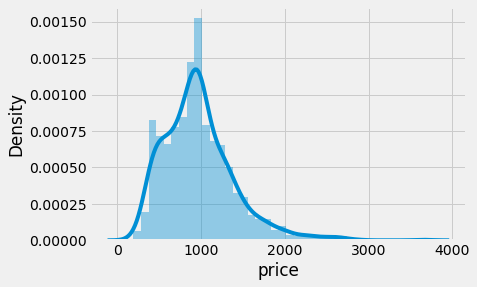

In [62]:
print(sns.distplot(df['price']))

- majority of hotel price lies between 500 to 2000 per night
- hotel price follow gussian trend but is positively skewed signifying there are some high priced hotels

<AxesSubplot:xlabel='price', ylabel='Count'>

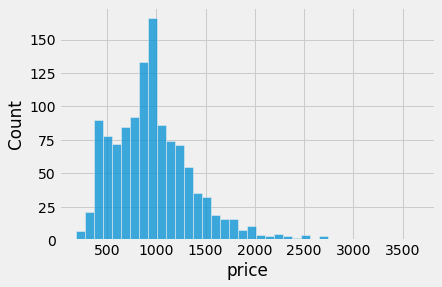

In [63]:
sns.histplot(df['price'])

<AxesSubplot:xlabel='price'>

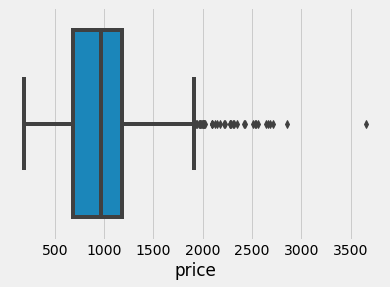

In [64]:
sns.boxplot(df['price'])

-  hotels priced above 1800-2000 Rs. can be termed as high priced hotels

In [65]:
#base_price - base price of hotel 

In [66]:
df["base_price"].mean()

2384.3728489483747

In [67]:
df["base_price"].median()

2315.0

In [68]:
df["base_price"].fillna(df["base_price"].mean(),inplace = True)

In [69]:
df["base_price"].describe()

count    1194.000000
mean     2384.372849
std       800.383529
min       558.000000
25%      1931.000000
50%      2384.372849
75%      2713.000000
max      8035.000000
Name: base_price, dtype: float64

In [70]:
df["base_price"].isnull().sum()

0

<AxesSubplot:xlabel='base_price'>

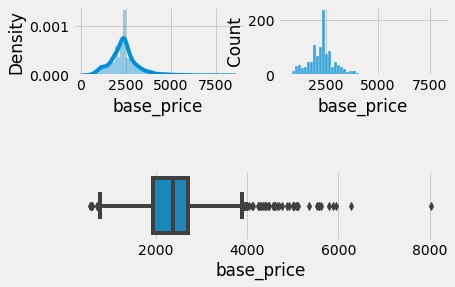

In [71]:
plt.subplot(3,2,1)
sns.distplot(df['base_price'])

plt.subplot(3,2,2)
sns.histplot(df['base_price'])
plt.subplot(3,1,3)
sns.boxplot(df['base_price'])

- base price of majority of hotels lies between 1000 to 4000
- hotel price follow gussian trend but is positively skewed signifying there are some high priced hotels
- hotel base price above 4000/ night can be termed as high priced hotels

In [72]:
#discount

In [73]:
df["discount"].mean()

59.396749521988525

In [74]:
df["discount"].median()

55.0

In [75]:
df["discount"].isnull().sum()

148

In [76]:
df["discount"].fillna(0,inplace = True)

In [77]:
df["discount"].isnull().sum()

0

In [78]:
df["base_price"].describe()

count    1194.000000
mean     2384.372849
std       800.383529
min       558.000000
25%      1931.000000
50%      2384.372849
75%      2713.000000
max      8035.000000
Name: base_price, dtype: float64

<AxesSubplot:xlabel='discount'>

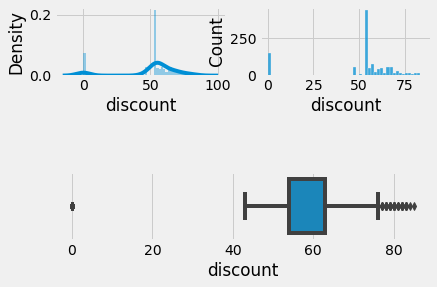

In [79]:
plt.subplot(3,2,1)
sns.distplot(df['discount'])

plt.subplot(3,2,2)
sns.histplot(df['discount'])
plt.subplot(3,1,3)
sns.boxplot(df['discount'])


- discount curve don't follow gaussian trend
- majority of hotels are discounted with 50 to 80% on base price


In [80]:
#No_of_Reviews

In [81]:
df["No_of_Reviews"].isnull().sum()

25

In [82]:
df["No_of_Reviews"].mean()

767.5260906757912

In [83]:
df["Ratings"].fillna(0, inplace = True)

In [84]:
df["No_of_Reviews"].isnull().sum()

25

<AxesSubplot:xlabel='No_of_Reviews'>

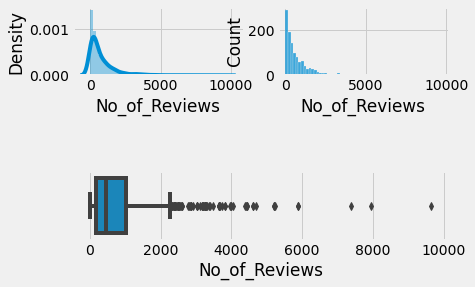

In [85]:
sns.distplot(df["No_of_Reviews"])
#matplotlib.rcParams['figure.figsize'] = (8,10)

plt.subplot(3,2,1)
sns.distplot(df['No_of_Reviews'])

plt.subplot(3,2,2)
sns.histplot(df['No_of_Reviews'])
plt.subplot(3,1,3)
sns.boxplot(df['No_of_Reviews'])

- majority of hotels are not reviewed
- count of hotels reduce with increasing number of reviews signifying only few hotels are highly reviewed 
- No_of_Reviews curve follow leptokurtic trend

In [86]:
#wizard

In [87]:
df["wizard_status"].value_counts()

False    677
True     517
Name: wizard_status, dtype: int64

<AxesSubplot:xlabel='wizard_status', ylabel='count'>

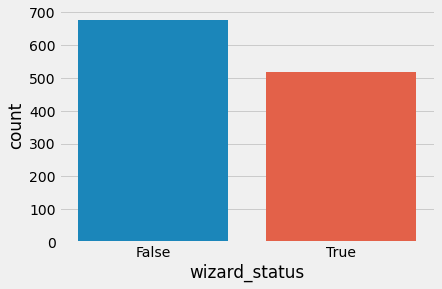

In [88]:
sns.countplot(df['wizard_status'])

In [89]:
#Ratings

In [90]:
df["Ratings"].fillna("missing").value_counts()

3.8    93
3.9    77
3.5    72
3.4    70
4.1    67
3.7    65
3.3    64
3.6    63
4.0    60
3.2    54
3.1    54
4.2    48
3.0    45
4.3    41
2.9    36
4.5    31
2.6    29
2.8    28
2.4    27
4.4    25
0.0    25
4.6    22
2.7    21
4.7    17
2.5    12
4.9     8
1.0     7
4.8     6
2.1     6
2.2     5
2.3     5
1.5     3
1.9     2
2.0     2
5.0     2
1.4     1
1.8     1
Name: Ratings, dtype: int64

In [91]:
df["Ratings"].fillna(0, inplace = True) # hotels are not rated  hence filling null value with 0 

In [92]:
df["Ratings"].isnull().sum()

0

Text(0.5, 1.0, 'Count of ratings')

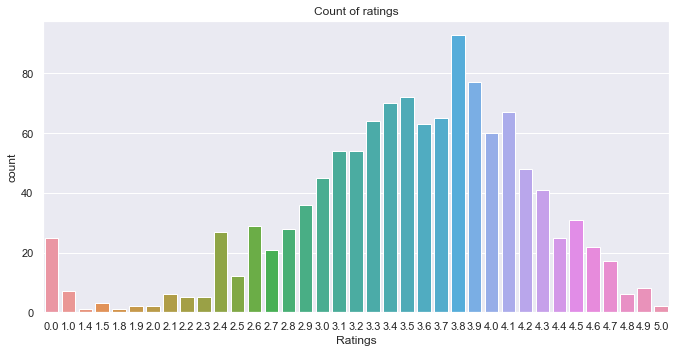

In [151]:
sns.countplot(df['Ratings'])
import matplotlib

sns.set(rc={'figure.figsize':(10,5)})
plt.title('Count of ratings')

- majority of hotles have rating between 2.4 to 4.7
- the trend follows Gaussian distribution pattern with negative skew and mode at 3.8

In [94]:
#remarks

In [95]:
df["Remarks"].value_counts()

·Fair         472
·Good         370
·Very Good    241
·Excellent     76
·Fabulous      10
Name: Remarks, dtype: int64

In [96]:
df["Remarks"].isnull().sum()

25

In [97]:
df["Remarks"].mode()

0    ·Fair
dtype: object

In [98]:
df["Remarks"].fillna(df["Remarks"].mode()[0], inplace = True)

Text(0.5, 1.0, 'Remarks wise hotels distribution')

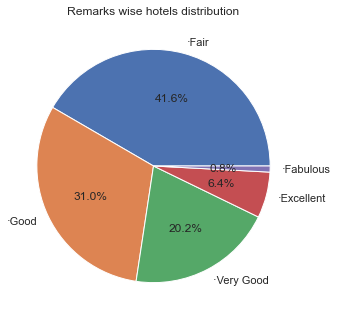

In [136]:
plt.pie(df["Remarks"].value_counts(),labels = df["Remarks"].value_counts().index,autopct = '%1.1f%%')
sns.set(rc={'figure.figsize':(5,5)})
plt.title('Remarks wise hotels distribution')

In [100]:
#city

In [101]:
df["city"].describe()

count          1194
unique           11
top       bangalore
freq            190
Name: city, dtype: object

In [102]:
df["city"].value_counts()

bangalore      190
hyderabad      182
delhi          180
kolkata        151
noida          118
mumbai         108
pune            90
goa             87
chennai         65
pondicherry     20
ooty             3
Name: city, dtype: int64

Text(0.5, 1.0, 'City wise number of hotels analysis')

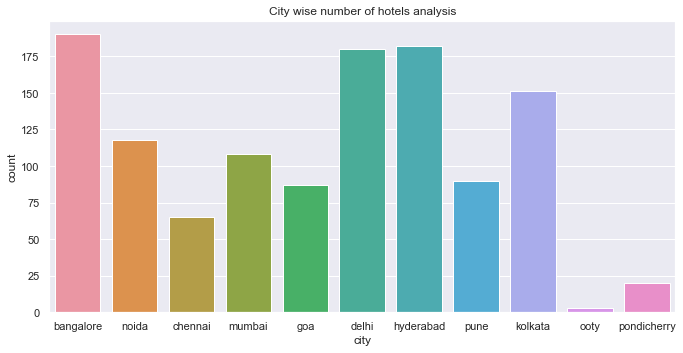

In [141]:
sns.countplot(df['city'])
matplotlib.rcParams['figure.figsize'] = (10,5)
plt.title('City wise number of hotels analysis')

In [104]:
#category

In [105]:
df["category"].describe()

count       1194
unique         7
top       normal
freq         565
Name: category, dtype: object

In [106]:
df["category"].value_counts()

normal        565
flagship      150
collection    131
townhouse     120
capital o     110
spot on        77
home           41
Name: category, dtype: int64

Text(0.5, 1.0, 'Category wise hotels distribution')

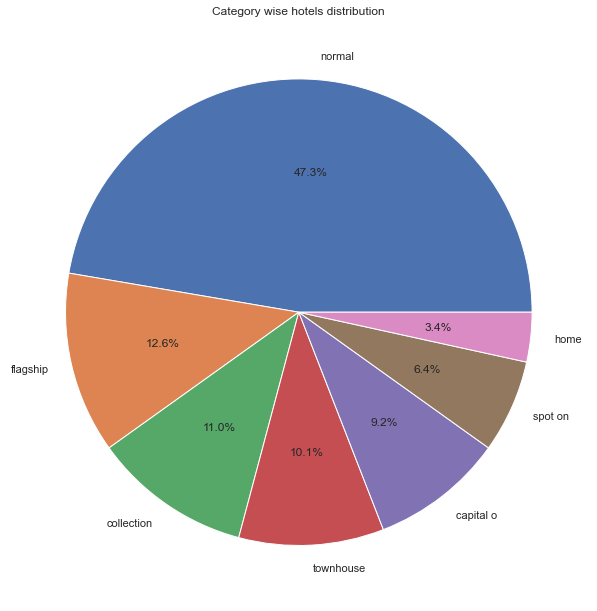

In [131]:
plt.pie(df["category"].value_counts(),labels = df["category"].value_counts().index,autopct = '%1.1f%%')

plt.title('Category wise hotels distribution')

- number of hotels in each category behaves like normal >flagship >collection>townhouse >capital o  >spot on  >home

# bivariate analysis -
It is a methodical statistical technique applied to a pair of variables (features/ attributes) of data to determine the empirical relationship between them

categorical and numerical

Text(0, 0.5, 'Price')

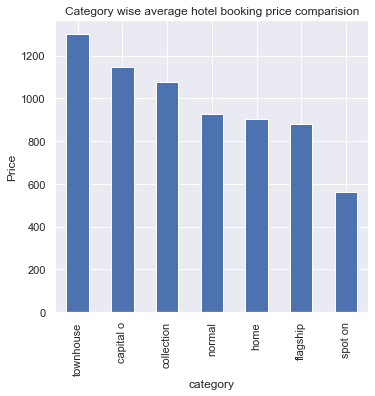

In [155]:
df.groupby(["category"])["price"].mean().sort_values(ascending = False).plot.bar()

plt.title('Category wise average hotel booking price comparision')
matplotlib.rcParams['figure.figsize'] = (5,5)
plt.ylabel('Price')


- aveage price of townhouse >capital-O > Collection > Normal> Home > Flagship >Spot - on

Text(0.5, 1.0, 'City wise average  hotels rating  comparision')

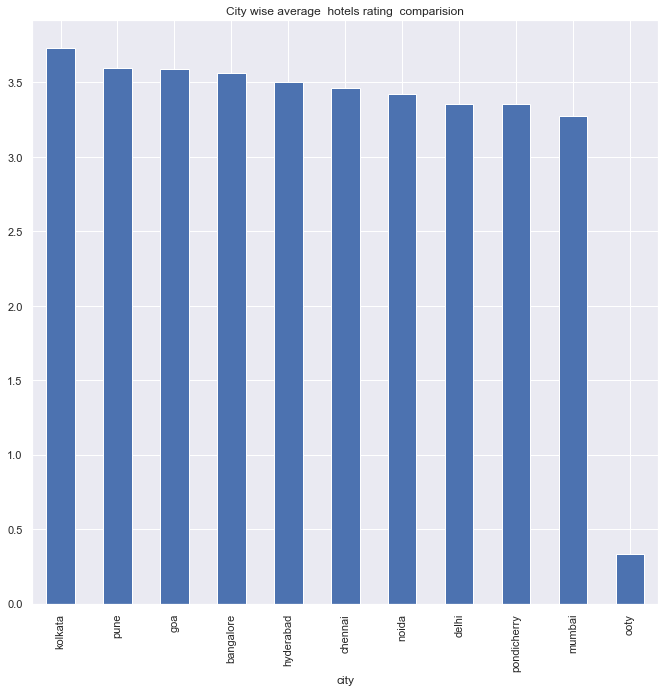

In [109]:
df.groupby(["city"])["Ratings"].mean().sort_values(ascending = False).plot.bar()
plt.title('City wise average  hotels rating  comparision')

- no much variation in average ratings among diffrent  cities, except ooty 

Text(0.5, 1.0, 'City wise total reviews ')

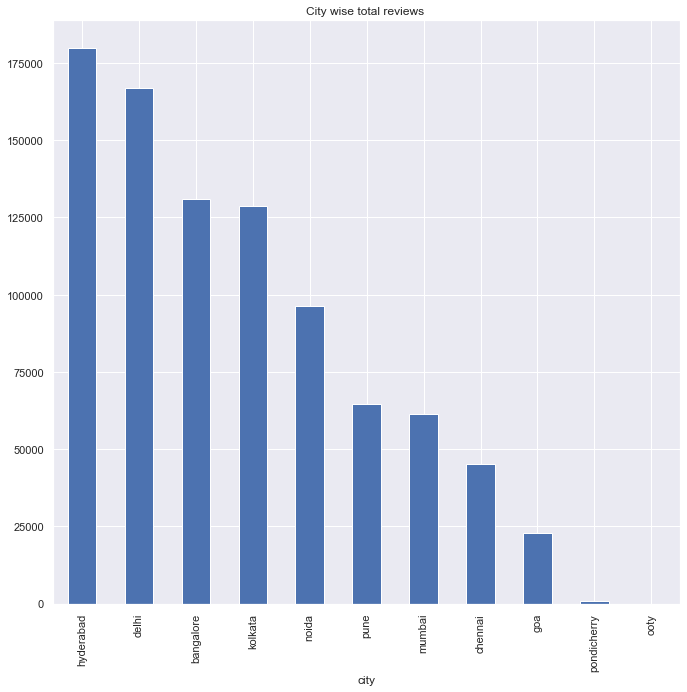

In [110]:
df.groupby(["city"])["No_of_Reviews"].sum().sort_values(ascending = False).plot.bar()

plt.title('City wise total reviews ')



- metro cities like hyderabad, delhi, bangalore has highest reviews signify highest number of chekins

- tourist places like goa, pondichery , ooty has very less number of reviews signifying less number of checkins

Text(0.5, 1.0, 'Hotel Remarks wise average  hotels rating  comparision')

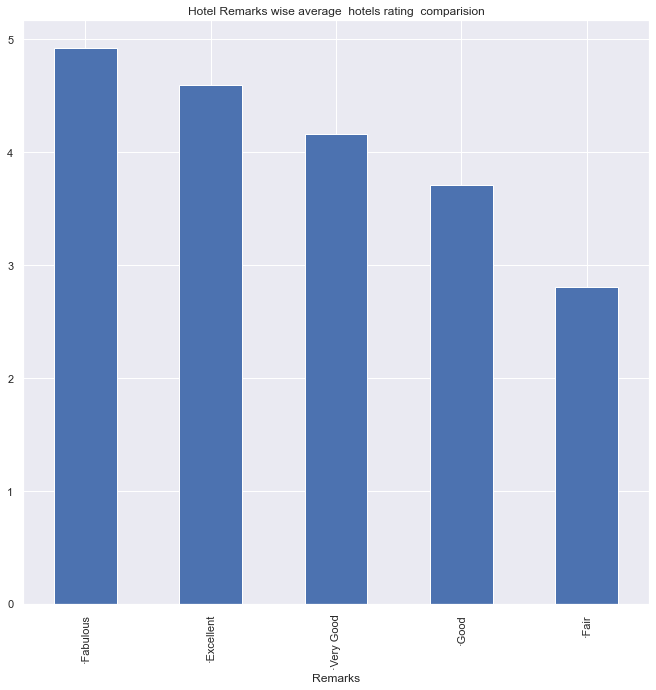

In [111]:
df.groupby(["Remarks"])["Ratings"].mean().sort_values(ascending = False).plot.bar()
plt.title('Hotel Remarks wise average  hotels rating  comparision')

- ratings reduces with quality of remarks

Text(0, 0.5, 'Price')

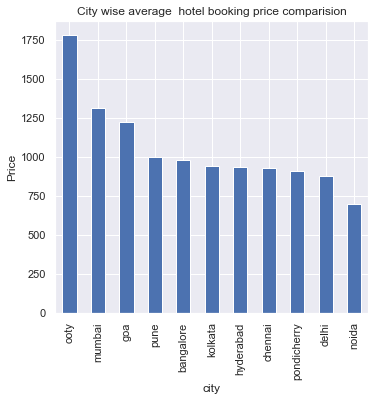

In [156]:
df.groupby(["city"])["price"].mean().sort_values(ascending = False).plot.bar()
plt.title('City wise average  hotel booking price comparision')

matplotlib.rcParams['figure.figsize'] = (5,5)
plt.ylabel('Price')

- ooty is highest average per night price
- noida has least average per night price

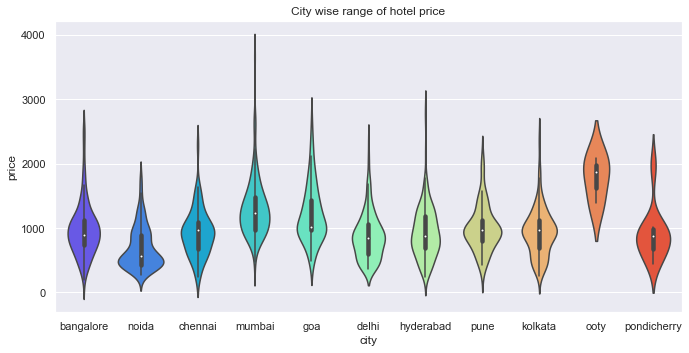

In [163]:
sns.violinplot(x="city", y="price", data=df,palette='rainbow')
plt.title('City wise range of hotel price')

matplotlib.rcParams['figure.figsize'] = (10,5)

- mumbai has wide range of hotel pricing 

- ooty has narrow as ranged hotel pricing with highest median value

Text(0.5, 1.0, 'Category  wise overpriced hotels comparision')

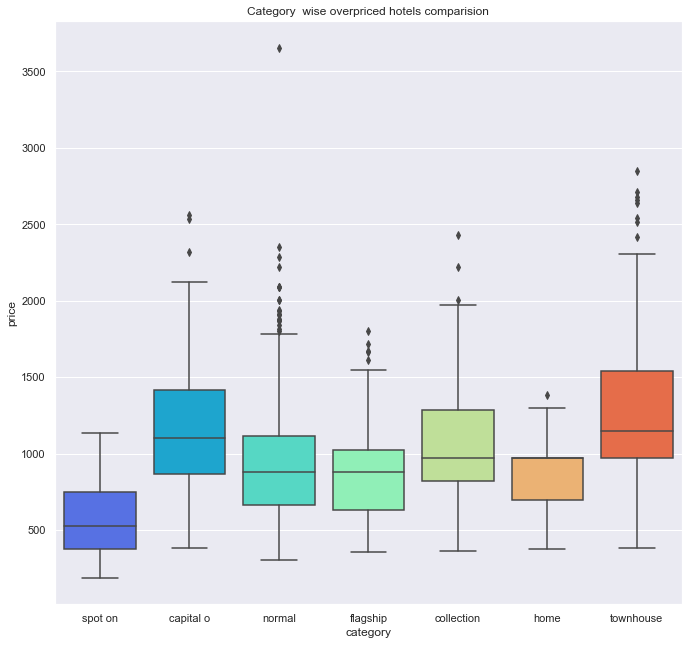

In [114]:
sns.boxplot(x="category", y="price", data=df,palette='rainbow')

plt.title('Category  wise overpriced hotels comparision')

- normal and townhouse have high number of overpriced hotels


categorical and categorical

Text(0.5, 1.0, 'Category  wise wizard status of hotels')

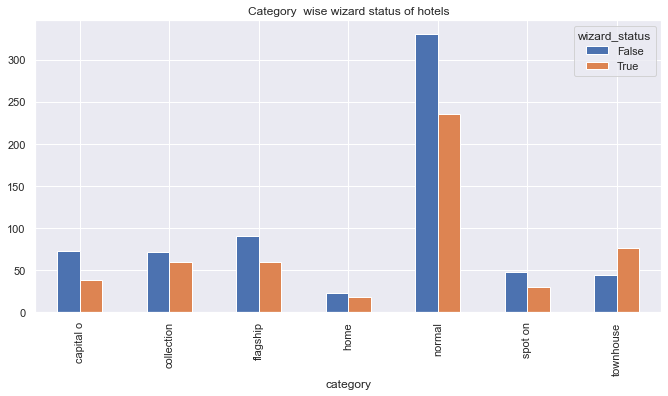

In [171]:
pd.crosstab(df.category,df.wizard_status).plot.bar()
plt.title('Category  wise wizard status of hotels')

- in each category of hotels non wizards are more than wizard membered hotels except in townhouse

Text(0.5, 1.0, 'Count of City and category wise distribution  ')

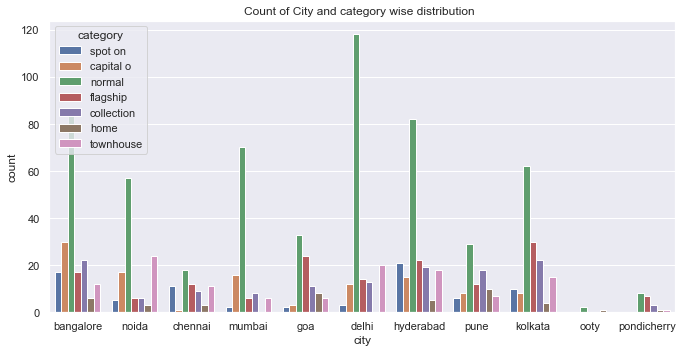

In [169]:
sns.countplot(x =df.city, hue = df.category )
plt.title('Count of City and category wise distribution  ')

- spot-ons are highest in bangalore and hyderabad
- capital -  are highest in bangalore and mumbai
- flagships are highest in kolkata and goa
- collection are highest in bangalore and kolkata
- oyo homes are highest in pune and goa
- townhouse are highest in noida

<AxesSubplot:xlabel='category'>

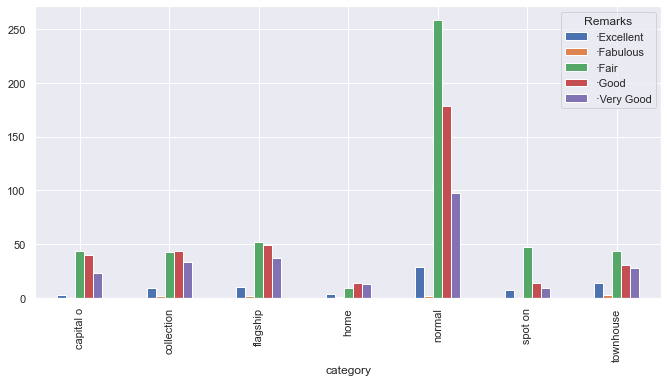

In [170]:
pd.crosstab(df.category,df.Remarks).plot.bar()

- hotels in all categories have highest remark as fair except in home category
- excellent and fabulous remarks are achived by only few hotels in each category

<AxesSubplot:xlabel='city', ylabel='count'>

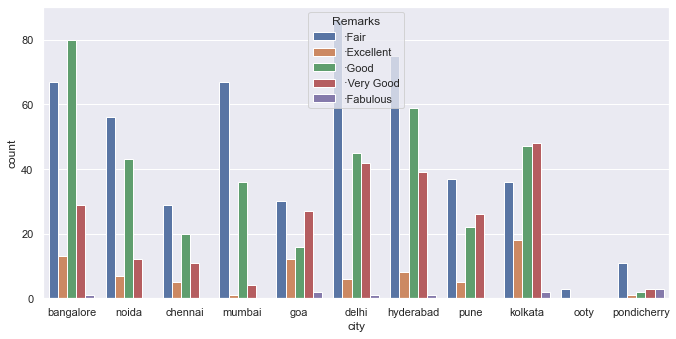

In [166]:
sns.countplot(x =df.city, hue = df.Remarks, data = df)

numerical and numerical

<AxesSubplot:xlabel='Ratings'>

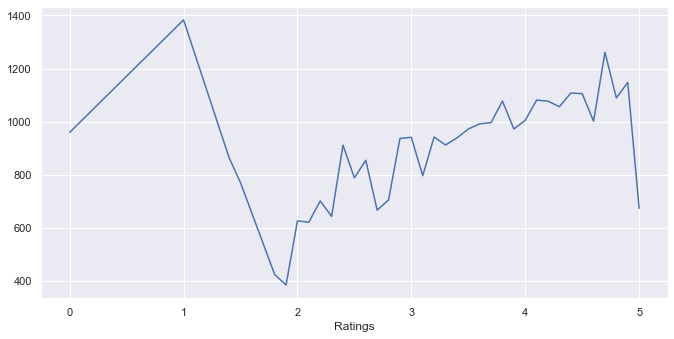

In [173]:
df.groupby(["Ratings"])["price"].mean().plot.line()

- some low rated hotels are high priced
- price of hotels increase with rating between 2 to 4.8
- some high rated hotels are priced less

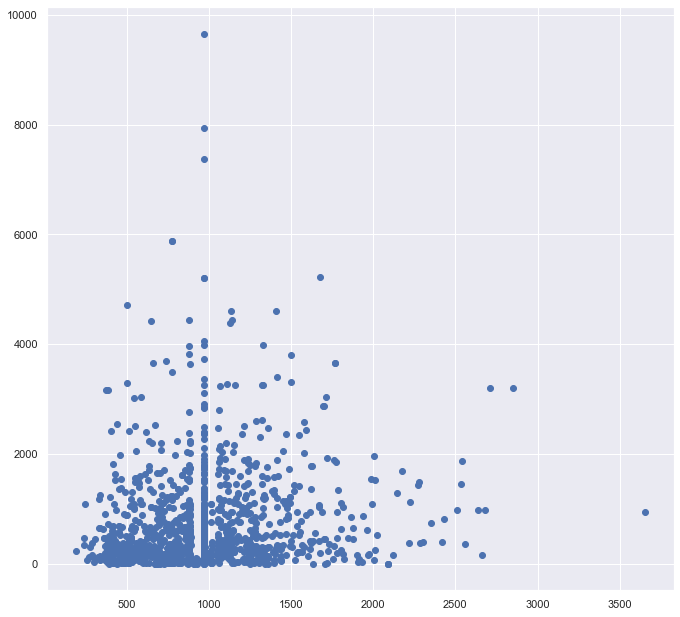

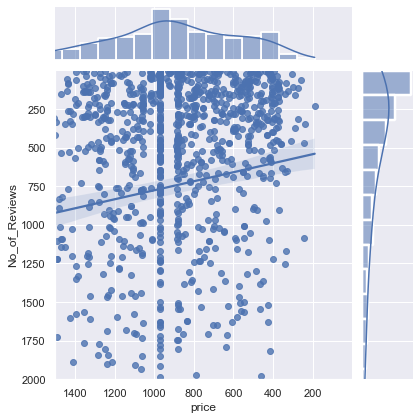

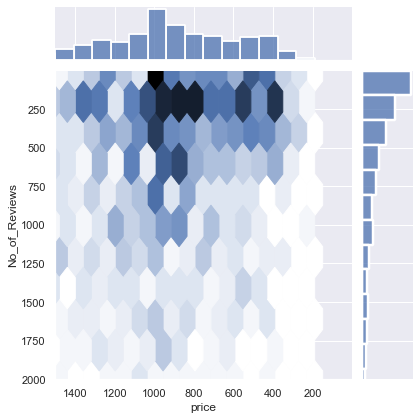

In [120]:
print(plt.scatter(x = 'price', y = 'No_of_Reviews', data = df))

print(sns.jointplot(x='price',y = 'No_of_Reviews',  data = df , kind = "reg",xlim = 1500,ylim = 2000))
print(sns.jointplot(x='price',y = 'No_of_Reviews',  data = df , kind = "hex",xlim = 1500,ylim = 2000))

- price and number of reviews are directly related
- most bookings are done to less numbber of reviewed hotels under 1000RS /night price

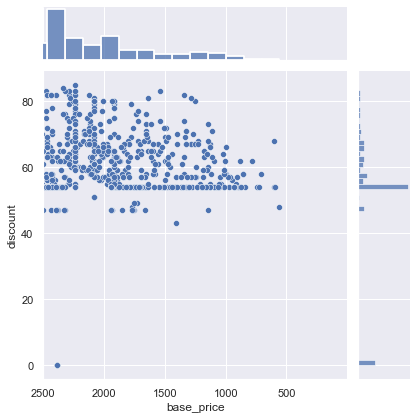

In [121]:
print(sns.jointplot(x='base_price',y = 'discount',  data = df,kind = 'scatter', xlim = 2500))

- most of the hotels have baseprice around 2300 and discount around 55%
- hotels are mostly discounted more than 50% on base price
- if baseprice is more, hotels mostly give discounts

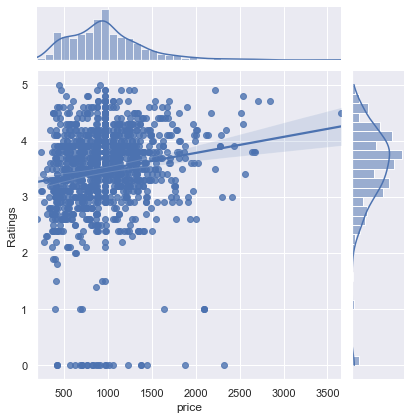

In [122]:
print(sns.jointplot(x='price',y = 'Ratings',  data = df,kind = 'reg'))

- most of the hotels are rated around 4 and priced around 500-1000
- hotel price/night and ratings are directly related

<AxesSubplot:xlabel='category'>

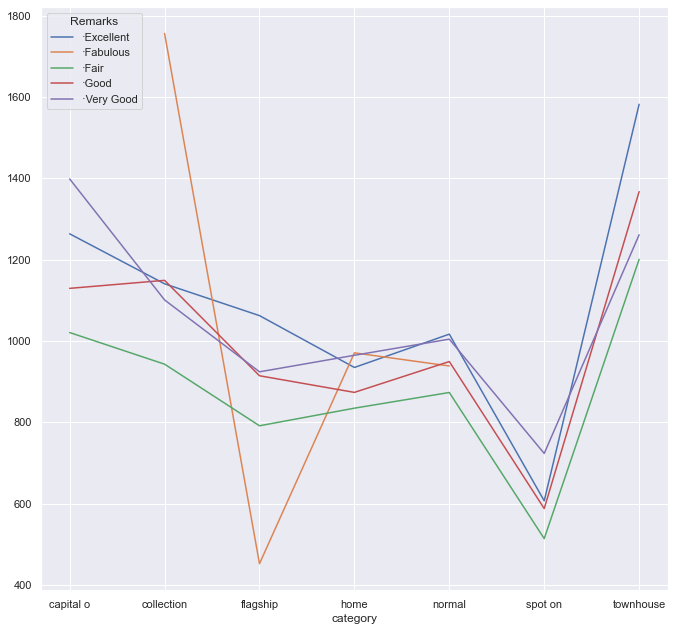

In [123]:
pd.crosstab(df.category,df.Remarks,values = df.price,aggfunc = np.mean).plot.line()

 - highest priced fabolous remarked hotels are  in collection category
 - highest priced excellent remarked hotels are  in townhouse category
 - highest priced verygood remarked hotels are  in capital -o  category
 - highest priced good remarked hotels are  in townhouse category
 - highest priced fair remarked hotels are  in capital -o category
 
 - lowest priced hotels are in spot-on category

# Multivariate Analysis

<AxesSubplot:>

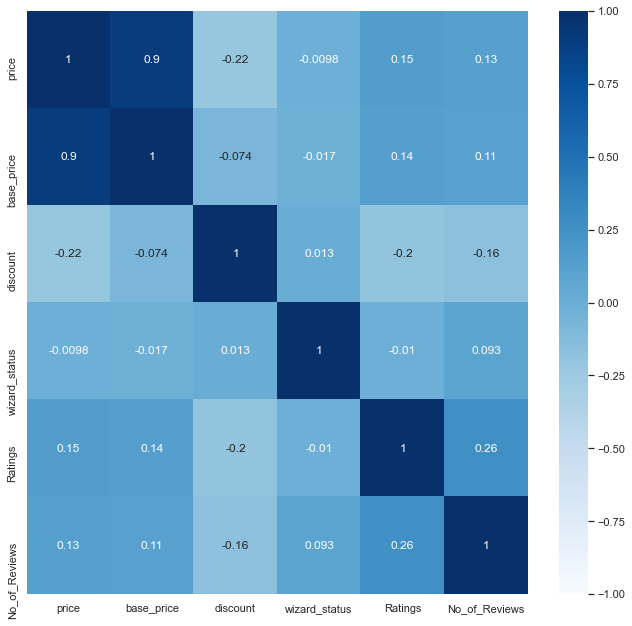

In [124]:
sns.heatmap(df.corr(),annot = True,vmin = -1, vmax = 1,center = 0,cmap = 'Blues')

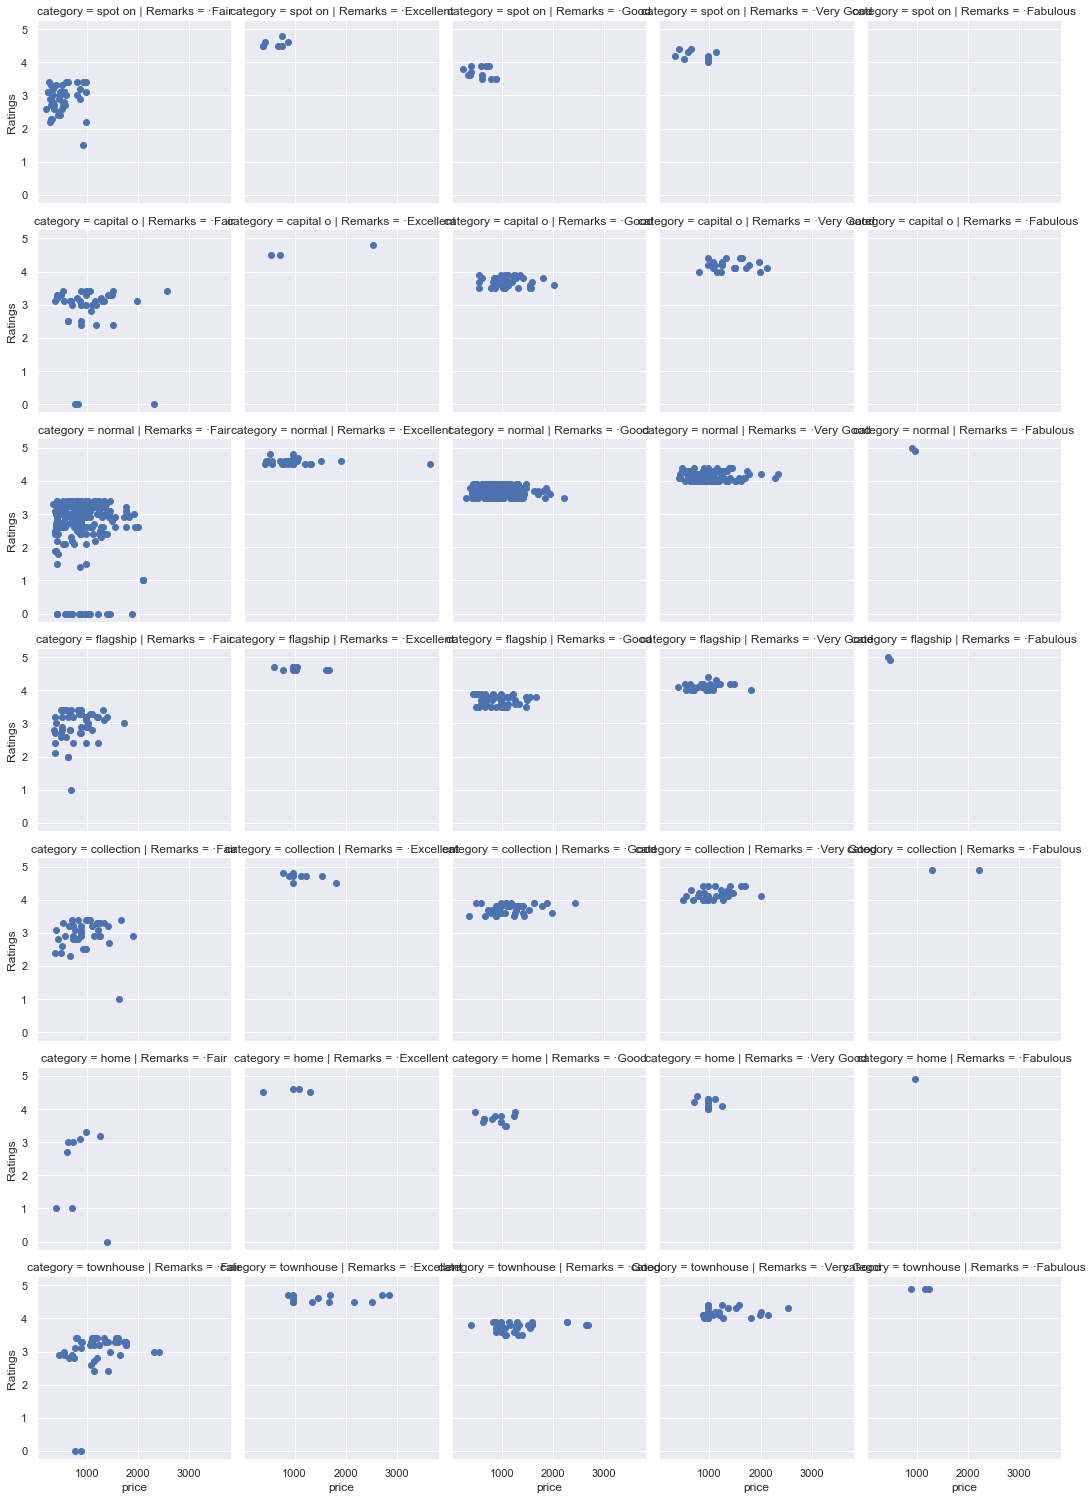

In [126]:
tips_fg = sns.FacetGrid(df,col = 'Remarks',row = 'category')
tips_fg.map(plt.scatter,'price', 'Ratings')

# - By overall observation of datasets it can be concluded that majority of bookings are done for  1000rs / night , normal catagoried, fair remarked hotels, thus oyo should optimize around this price to maximize business, and people booking townhouse, capital - o, flagship categories doesn't compromise with quality for price thus oyo should further enhance quality at these catagories

# Model to specify hotel of choice

In [174]:
city = str(input("Enter City name:")).strip().casefold()
price = int(input("Enter maximum budget to book hotel:"))
rating = float(input("Enter minimum rating quality of hotel:"))
category = str(input("Enter category of hotel to be booked:")).strip().casefold()


df[(df["city"]==city) & (df["price"]<=price) & (df["Ratings"]>=rating) & (df["category"]==category)]


Enter City name:Bangalore
Enter maximum budget to book hotel:1000
Enter minimum rating quality of hotel:3.5
Enter category of hotel to be booked:Collection


,title,price,base_price,discount,wizard_status,Ratings,No_of_Reviews,Remarks,city,category
33,Collection O 81399 Hotel Ur Comforts Jayanagar,885.0,2534.0,65.0,False,4.0,556.0,·Very Good,bangalore,collection
101,Collection O Onyx International,879.0,2984.0,70.0,False,3.6,103.0,·Good,bangalore,collection
